In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.decomposition import PCA
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
# https://datascienceschool.net/view-notebook/f10aad8a34a4489697933f77c5d58e3a/
# https://www.youtube.com/watch?v=DUJ2vwjRQag
# https://www.youtube.com/watch?v=FhQm2Tc8Kic

#  *  https://nittaku.tistory.com/291  *

In [2]:
filename = 'total_data1.xlsx'
data = pd.read_excel(filename)

In [35]:
data

,Unnamed: 0,url,제목,메이커,펀딩시작날짜,펀딩마감날짜,펀딩시작요일,목표금액,달성액,달성률,...,디자인소품,반려동물,뷰티,스포츠·모빌리티,여행·레저,테크·가전,패션·잡화,푸드,홈리빙,펀딩성공여부
0,0,https://www.wadiz.kr/web/campaign/detail/40364,직접기른 비트와 당근으로 만들어 먹기편한 레드비트즙,오케이네이쳐,2019-08-01,2019-08-11,Thu,500000,803000,160,...,0,0,0,0,0,0,0,1,0,1
1,1,https://www.wadiz.kr/web/campaign/detail/42242,[ 딱! 7일간 진행 ! ] 딱딱함 뒤에 달콤한 매력의 오도로끼 !,올마망(all maman),2019-08-05,2019-08-11,Mon,1000000,5862300,586,...,0,0,0,0,0,0,0,1,0,1
2,2,https://www.wadiz.kr/web/campaign/detail/41247,어묵을 과자처럼 간편하게. 스틱어묵.,곰살어묵,2019-07-29,2019-08-11,Mon,1000000,1302700,130,...,0,0,0,0,0,0,0,1,0,1
3,3,https://www.wadiz.kr/web/campaign/detail/40903,당신의 첫 평냉 한반도랭면과 함께~!,한반도키친,2019-07-31,2019-08-11,Wed,1000000,16351000,1635,...,0,0,0,0,0,0,0,1,0,1
4,4,https://www.wadiz.kr/web/campaign/detail/39134,[퇴근전5분 집중!]진~짜 맛있네요. 설탕 0% 210kcal 꿀~꺽,라이프어터,2019-07-26,2019-08-11,Fri,1000000,20678800,2067,...,0,0,0,0,0,0,0,1,0,1
5,5,https://www.wadiz.kr/web/campaign/detail/40569,⭐5673% 앵콜 펀딩⭐ '밀크티 성지' 오렌지리프 - 밀크티 시럽 5종,오렌지리프(ORANGE LEAF),2019-07-25,2019-08-11,Thu,1000000,24888600,2488,...,0,0,0,0,0,0,0,1,0,1
6,6,https://www.wadiz.kr/web/campaign/detail/34700,[크리스피 라이스칩]아침밥을 잃은 직장인 어른이들을 위한 초간편 미식칩,크리스피 라이스칩,2019-07-26,2019-08-11,Fri,500000,1706888,341,...,0,0,0,0,0,0,0,1,0,1
7,7,https://www.wadiz.kr/web/campaign/detail/34681,스트레스로 인한 피로에서 벗어나는 가장 쉬운 방법!!,영동건강,2019-07-11,2019-08-11,Thu,500000,2583100,516,...,0,0,0,0,0,0,0,1,0,1
8,8,https://www.wadiz.kr/web/campaign/detail/39745,"수고했어, 오늘도! 모든 스트레스를 한 방에 부셔줄 <퇴근 후 간식박스>",맘마레시피,2019-07-31,2019-08-11,Wed,500000,2057000,411,...,0,0,0,0,0,0,0,1,0,1
9,9,https://www.wadiz.kr/web/campaign/detail/21190,스페셜티커피를 뛰어넘는 Exclusive Coffee를 즐겨보세요,(주) 훌리리,2019-07-22,2019-08-11,Mon,3000000,390000,13,...,0,0,0,0,0,0,0,1,0,0


In [39]:
wadiz1 = data[['목표금액','달성액','서포터수','좋아요수',
               '글업데이트수','댓글수','리워드종류수','이미지수',
              '비디오수','마감배송차이','인스타존재여부',
              '인스타팔로워수','와디즈팔로워수','과거프로젝트수',
               '과거성공프로젝트수','앵콜펀딩여부']]
wadiz1_clmn = ['목표금액','달성액','서포터수','좋아요수',
               '글업데이트수','댓글수','리워드종류수','이미지수',
              '비디오수','마감배송차이','인스타존재여부',
              '인스타팔로워수','와디즈팔로워수','과거프로젝트수',
               '과거성공프로젝트수','앵콜펀딩여부']
#wadiz = data[['펀딩시작요일','펀딩시작날짜','펀딩마감날짜','배송시작날짜']]
wadiz_s = data[['펀딩성공여부']]

In [36]:
data.columns

Index(['Unnamed: 0', 'url', '제목', '메이커', '펀딩시작날짜', '펀딩마감날짜', '펀딩시작요일', '목표금액',
       '달성액', '달성률', '서포터수', '좋아요수', '요약글', '글업데이트수', '댓글수', '리워드종류수', '이미지수',
       '비디오수', '배송시작날짜', '마감배송차이', '인스타존재여부', '인스타팔로워수', '와디즈팔로워수', '과거프로젝트수',
       '과거성공프로젝트수', '앵콜펀딩여부', '디자인소품', '반려동물', '뷰티', '스포츠·모빌리티', '여행·레저',
       '테크·가전', '패션·잡화', '푸드', '홈리빙', '펀딩성공여부'],
      dtype='object')

In [9]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(wadiz1)

C:\Users\freez\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\freez\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [10]:
x_std

array([[-0.34192644, -0.27148155, -0.3430162 , ..., -0.56196484,
        -0.42686297, -0.30680231],
       [-0.23843123, -0.15314514, -0.05678036, ..., -0.56196484,
        -0.42686297, -0.30680231],
       [-0.23843123, -0.25979363, -0.29078338, ..., -0.56196484,
        -0.42686297, -0.30680231],
       ...,
       [-0.23843123,  0.81005477,  0.96698288, ...,  0.93370441,
         1.12798394, -0.30680231],
       [-0.23843123, -0.29026363, -0.35764139, ..., -0.56196484,
        -0.73783235, -0.30680231],
       [-0.03144082, -0.27932418, -0.38689177, ..., -0.56196484,
        -0.73783235, -0.30680231]])

In [11]:
features = x_std.T

In [13]:
covariance_matrix = np.cov(features)  # 공분산행렬
print(covariance_matrix)

[[ 1.00015559  0.08895754  0.0268043   0.04386675  0.01905745  0.05702549
  -0.05232111 -0.02207935  0.06070141  0.11642909  0.04131235  0.00325979
  -0.00435768 -0.06281386 -0.08409636 -0.05752967]
 [ 0.08895754  1.00015559  0.70613035  0.78275372  0.37582917  0.70339515
   0.0716052   0.1543312   0.11867034  0.09286573 -0.00403805  0.02542701
   0.36271881  0.03305779  0.06643283  0.05698196]
 [ 0.0268043   0.70613035  1.00015559  0.85119337  0.41948503  0.84194698
   0.07880168  0.16320217  0.10891229  0.05602776 -0.0166184   0.03083469
   0.33120676  0.05467615  0.09810374  0.0716489 ]
 [ 0.04386675  0.78275372  0.85119337  1.00015559  0.46416655  0.77360989
   0.08786254  0.2067057   0.13860017  0.09003492 -0.01324229  0.0354327
   0.36540615  0.05806629  0.1063844   0.06626218]
 [ 0.01905745  0.37582917  0.41948503  0.46416655  1.00015559  0.45086059
   0.16332551  0.25625286  0.16624858  0.06326296 -0.05276749  0.00375056
   0.27585433  0.12324863  0.19721239  0.09446701]
 [ 0.0

In [32]:
cm = pd.DataFrame(covariance_matrix)

In [42]:
cm.columns = wadiz1_clmn
cm.index = wadiz1_clmn

In [43]:
cm
# 달성액 : 서포터수(70), 좋아요수(78), 댓글수(70)
# 서포터수 : 달성액(70), 좋아요수(85), 댓글수(84)
# 좋아요수 : 달성액(78), 서포터수(85), 댓글수(77)
# 댓글수 : 달성액(70), 서포터수(84), 좋아요수(77)
# 와디즈팔로워수 : 과거성공프로젝트수(66)
# 과거프로젝트수 : 과거성공프로젝트수(96)
# 과거성공프로젝트수 : 와디즈팔로워수(66), 과거프로젝트수(96)

,목표금액,달성액,서포터수,좋아요수,글업데이트수,댓글수,리워드종류수,이미지수,비디오수,마감배송차이,인스타존재여부,인스타팔로워수,와디즈팔로워수,과거프로젝트수,과거성공프로젝트수,앵콜펀딩여부
목표금액,1.000156,0.088958,0.026804,0.043867,0.019057,0.057025,-0.052321,-0.022079,0.060701,0.116429,0.041312,0.003260,-0.004358,-0.062814,-0.084096,-0.057530
달성액,0.088958,1.000156,0.706130,0.782754,0.375829,0.703395,0.071605,0.154331,0.118670,0.092866,-0.004038,0.025427,0.362719,0.033058,0.066433,0.056982
서포터수,0.026804,0.706130,1.000156,0.851193,0.419485,0.841947,0.078802,0.163202,0.108912,0.056028,-0.016618,0.030835,0.331207,0.054676,0.098104,0.071649
좋아요수,0.043867,0.782754,0.851193,1.000156,0.464167,0.773610,0.087863,0.206706,0.138600,0.090035,-0.013242,0.035433,0.365406,0.058066,0.106384,0.066262
글업데이트수,0.019057,0.375829,0.419485,0.464167,1.000156,0.450861,0.163326,0.256253,0.166249,0.063263,-0.052767,0.003751,0.275854,0.123249,0.197212,0.094467
댓글수,0.057025,0.703395,0.841947,0.773610,0.450861,1.000156,0.067057,0.139010,0.133466,0.085132,-0.004897,0.023755,0.319731,0.038507,0.075780,0.027393
리워드종류수,-0.052321,0.071605,0.078802,0.087863,0.163326,0.067057,1.000156,0.353873,0.078077,-0.011203,-0.091641,0.021353,0.083626,0.066252,0.096751,0.059312
이미지수,-0.022079,0.154331,0.163202,0.206706,0.256253,0.139010,0.353873,1.000156,0.139820,0.088692,-0.149540,0.114100,0.169631,0.120292,0.159629,0.099459
비디오수,0.060701,0.118670,0.108912,0.138600,0.166249,0.133466,0.078077,0.139820,1.000156,0.049391,0.010133,0.028563,0.039066,-0.023263,-0.004602,0.019028
마감배송차이,0.116429,0.092866,0.056028,0.090035,0.063263,0.085132,-0.011203,0.088692,0.049391,1.000156,-0.029279,0.018209,0.013664,-0.016831,-0.022088,-0.017139


In [14]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [15]:
eig_vals

array([4.11294816, 2.40652487, 1.44896959, 0.03393945, 0.11304081,
       0.20653937, 0.30563587, 0.40155104, 1.12382749, 1.10600163,
       0.93476144, 0.89425088, 0.85791272, 0.79238979, 0.65979908,
       0.6043973 ])

In [22]:
wadiz1.columns

Index(['목표금액', '달성액', '서포터수', '좋아요수', '글업데이트수', '댓글수', '리워드종류수', '이미지수',
       '비디오수', '마감배송차이', '인스타존재여부', '인스타팔로워수', '와디즈팔로워수', '과거프로젝트수',
       '과거성공프로젝트수', '앵콜펀딩여부'],
      dtype='object')

In [16]:
eig_vecs

array([[-1.96763494e-02,  1.13378598e-01, -8.05596819e-02,
        -1.55704839e-02, -2.28164711e-03, -2.90288344e-02,
        -2.39309060e-02, -7.43210200e-02,  6.69107594e-01,
        -1.73645085e-02, -6.92245369e-02, -2.66413620e-01,
        -6.56354822e-01, -1.35169360e-01, -1.49806279e-02,
         3.17363681e-03],
       [-3.92035252e-01,  2.00148800e-01, -1.00737933e-01,
        -1.86273099e-02, -2.04794163e-01,  3.06809057e-01,
         6.98801305e-01,  3.52450845e-01, -1.98437600e-02,
        -5.89954185e-02,  2.20062300e-02,  2.59582473e-04,
        -5.35771098e-02,  4.60473131e-02,  1.83736263e-01,
         6.34661371e-02],
       [-4.18108353e-01,  2.05518162e-01, -1.00247172e-01,
         1.14302135e-02, -6.98544582e-01, -2.72524232e-01,
        -2.75562501e-01, -3.19046265e-01, -1.17440205e-01,
        -6.64439025e-02,  1.28581680e-02,  1.62418850e-02,
        -1.58231386e-02,  4.01383065e-02,  1.08572029e-01,
         2.28665120e-02],
       [-4.28559115e-01,  1.99747508e

In [17]:
eig_vals[0] / sum(eig_vals)

0.2570192696518476

In [24]:
projected_X = x_std.dot(eig_vecs.T[0])

In [25]:
projected_X

array([ 1.49488323,  0.84343568,  0.91977738, ..., -3.23002951,
        0.54560879,  1.3992744 ])

In [26]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = wadiz_s

In [27]:
result

,PC1,y-axis,label
0,1.494883,0.0,1
1,0.843436,0.0,1
2,0.919777,0.0,1
3,-0.397508,0.0,1
4,0.128926,0.0,1
5,-0.970588,0.0,1
6,1.123910,0.0,1
7,0.843797,0.0,1
8,0.877012,0.0,1
9,1.367453,0.0,0


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'PCA result')

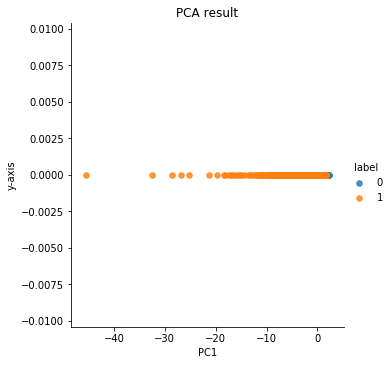

In [30]:
sns.lmplot('PC1','y-axis', data = result, fit_reg=False,
          scatter_kws = {"s":30}, hue='label')
plt.title('PCA result')